In [2]:
# 各ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics

In [3]:
# 個体クラスの定義
class Agent():
    def __init__(self, x):
        self.sex = np.random.choice(["m", "f"], p=[x, (1-x)])
        self.sexratio = x
        self.age = 0
        self.resource = 1
        self.death = False

    # 歳を取る
    def aging(self):
        self.age += 1
        
        self.resource -= 1

    # 死亡処理
    def judge_death(self):
        if self.age == 30:
            self.death = True
        elif self.resource == 0:
            self.death = True

In [4]:
# シミュレーションクラスの定義
class Simulation():
    def __init__(self, x, firstsize, max_resource):
        self.population = self.__initialize(x, firstsize)
        self.max_resource = max_resource

    # 初期集団をつくる
    def __initialize(self, x, firstsize):
        population = []

        for i in range(firstsize):
            population.append(Agent(x))
        
        return population


    # 次世代の性比強度の決定
    def __make_nextGen(self, female, male):
        ave = 0
        nextgen = -1
    
        # 両親の性比強度の平均
        ave = (female.sexratio + male.sexratio) / 2
        # 平均ave、分散0.1の正規分布から次世代の値を決定
        while nextgen < 0 or nextgen >= 1:
            nextgen = np.random.normal(ave, 0.1)
    
        return nextgen


    # 集団内の交尾
    def __copulation(self):
        male_population = []
        female_population = []
        newgen = []

        # オスメスの振り分け
        # 生殖可能な個体を選ぶ
        for focal in self.population:
            if (focal.sex == 'm') and (focal.age > 5):
                male_population.append(focal)
            elif (focal.sex == 'f') and (focal.age > 5) :
                female_population.append(focal)

        # 交尾の回数を決定
        if len(female_population) >= len(male_population):
            cop_i = len(male_population)
        else:
            cop_i = len(female_population)
        
        # 交尾させる雌雄の抽出と交配
        for i in range(cop_i):
            cop_female = female_population.pop(random.randrange(len(female_population)))
            cop_male = male_population.pop(random.randrange(len(male_population)))
            newgen.append(self.__make_nextGen(cop_female, cop_male))
        
        return newgen

    
    # 資源の分配
    def __distribution(self):
        random.shuffle(self.population)
        x = self.max_resource
        if x < len(self.population):
            for i in range(x):
                self.population[i].resource += 1
        else:
            for focal in self.population:
                focal.resource += 1


    # 1世代のシミュレーションを実行
    def run_one_episode(self):
            
        newegg = self.__copulation()
        for i in newegg:
            self.population.append(Agent(i))

        self.__distribution()

        for focal in self.population:
            focal.aging()
            focal.judge_death()
            if focal.death:
                index = self.population.index(focal)
                del self.population[index]

In [5]:
# main処理
def main(x, firstsize, max_resource, iteration):
    t = list(range(1, (iteration + 1)))
    whole_size = []
    sexratio = []
    simulation = Simulation(x, firstsize, max_resource)
    
    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        male_size = 0
        for focal in simulation.population:
            if focal.sex == 'm':
                male_size += 1
        whole_size.append(len(simulation.population))
        sexratio.append(male_size / len(simulation.population))

    plt.figure()
    plt.plot(t, sexratio)
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.grid(True)

    plt.figure()
    plt.plot(t, whole_size)
    plt.title('whole size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 1000/1000 [00:21<00:00, 46.97it/s]


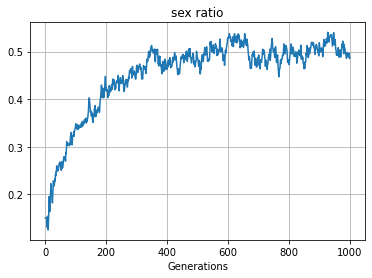

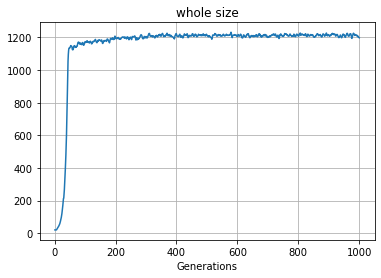

In [6]:
# 初期性比0.2、初期集団サイズ20、総資源1000、ループ回数1000
main(0.2, 20, 1000, 1000)

100%|██████████| 100/100 [00:00<00:00, 1445.65it/s]


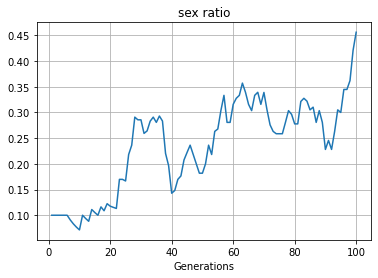

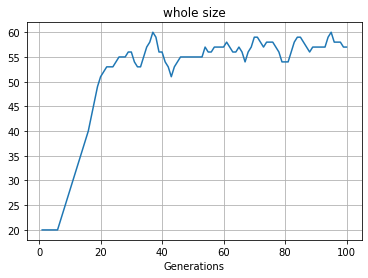

In [7]:
# 初期性比0.2、初期集団サイズ20、総資源50、ループ回数100
main(0.2, 20, 50, 100)

・変数

寿命：30年

出産のクールタイム：5年

初期性比：x

・設定するもの

ループ回数：iteration

初期集団サイズ：firstsize

資源の総量：max_resourse

・流れ

出産→資源の分配→年齢の更新、資源の消費、クールタイムの消費
（クールタイム実質4年になる？）

In [8]:
# 各ライブラリのインストール
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import statistics

In [9]:
# 個体クラスの定義
class Agent():
    def __init__(self, x):
        self.sex = np.random.choice(["m", "f"], p=[x, (1-x)])
        self.sexratio = x
        self.age = 0
        self.cool_time = 0
        self.resource = 1
        self.death = False

    # 歳を取る
    def aging(self):
        self.age += 1
        
        self.resource -= 1

        if self.cool_time != 0:
            self.cool_time -= 1

    # 死亡処理
    def judge_death(self):
        if self.age == 30:
            self.death = True
        elif self.resource == 0:
            self.death = True

In [10]:
# シミュレーションクラスの定義
class Simulation():
    def __init__(self, x, firstsize, max_resource):
        self.population = self.__initialize(x, firstsize)
        self.max_resource = max_resource

    # 初期集団をつくる
    def __initialize(self, x, firstsize):
        population = []

        for i in range(firstsize):
            population.append(Agent(x))
        
        return population


    # 次世代の性比強度の決定
    def __make_nextGen(self, female, male):
        ave = 0
        nextgen = -1
    
        # 両親の性比強度の平均
        ave = (female.sexratio + male.sexratio) / 2
        # 平均ave、分散0.1の正規分布から次世代の値を決定
        while nextgen < 0 or nextgen >= 1:
            nextgen = np.random.normal(ave, 0.1)
    
        return nextgen


    # 集団内の交尾
    def __copulation(self):
        male_population = []
        female_population = []
        newgen = []

        # オスメスの振り分け
        # 生殖可能な個体を選ぶ
        for focal in self.population:
            if (focal.sex == 'm') and (focal.age > 5):
                male_population.append(focal)
            elif (focal.sex == 'f') and (focal.age > 5) and (focal.cool_time == 0):
                female_population.append(focal)

        # 交尾の回数を決定
        if len(female_population) >= len(male_population):
            cop_i = len(male_population)
        else:
            cop_i = len(female_population)
        
        # 交尾させる雌雄の抽出と交配
        # クールタイムの発生
        for i in range(cop_i):
            cop_female = female_population.pop(random.randrange(len(female_population)))
            cop_male = male_population.pop(random.randrange(len(male_population)))
            newgen.append(self.__make_nextGen(cop_female, cop_male))
            
            cop_female.cool_time = 5
        
        return newgen

    
    # 資源の分配
    def __distribution(self):
        random.shuffle(self.population)
        x = self.max_resource
        if x < len(self.population):
            for i in range(x):
                self.population[i].resource += 1
        else:
            for focal in self.population:
                focal.resource += 1


    # 1世代のシミュレーションを実行
    def run_one_episode(self):
            
        newegg = self.__copulation()
        for i in newegg:
            self.population.append(Agent(i))

        self.__distribution()

        for focal in self.population:
            focal.aging()
            focal.judge_death()
            if focal.death:
                index = self.population.index(focal)
                del self.population[index]

In [11]:
# main処理
def main(x, firstsize, max_resource, iteration):
    t = list(range(1, (iteration + 1)))
    whole_size = []
    sexratio = []
    simulation = Simulation(x, firstsize, max_resource)
    
    for i in tqdm(range(iteration)):
        simulation.run_one_episode()

        male_size = 0
        for focal in simulation.population:
            if focal.sex == 'm':
                male_size += 1
        whole_size.append(len(simulation.population))
        sexratio.append(male_size / len(simulation.population))

    plt.figure()
    plt.plot(t, sexratio)
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.grid(True)

    plt.figure()
    plt.plot(t, whole_size)
    plt.title('whole size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 1000/1000 [00:10<00:00, 92.66it/s]


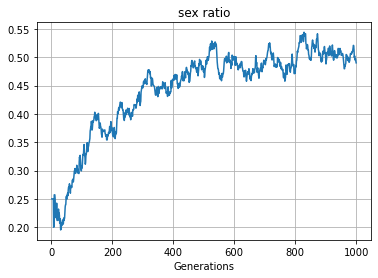

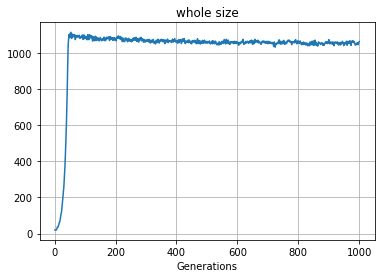

In [12]:
# 初期性比0.2、初期集団サイズ20、総資源1000、ループ回数1000
main(0.2, 20, 1000, 1000)

100%|██████████| 1000/1000 [00:07<00:00, 141.77it/s]


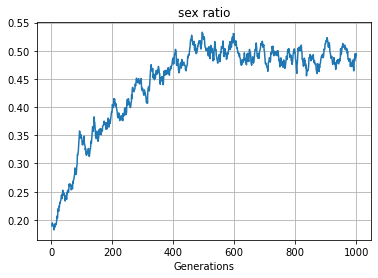

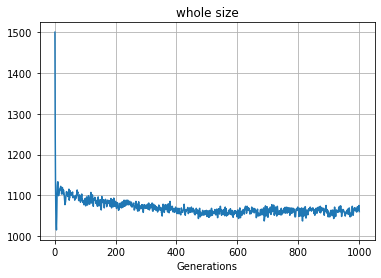

In [34]:
# 初期性比0.2、初期集団サイズ20、総資源1000、ループ回数1000
main(0.2, 2000, 1000, 1000)

100%|██████████| 100/100 [00:00<00:00, 1099.84it/s]


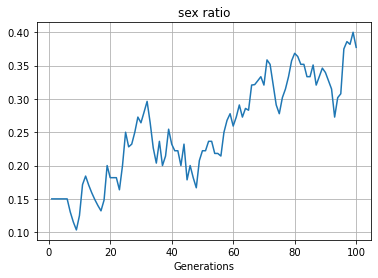

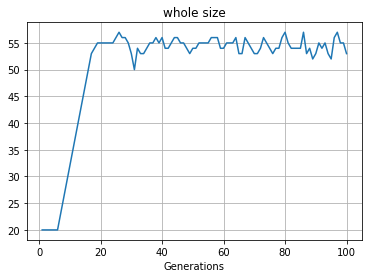

In [13]:
# 初期性比0.2、初期集団サイズ20、総資源50、ループ回数100
main(0.2, 20, 50, 100)

In [32]:
# main処理
def main_S(x, firstsize, max_resource_list, iteration):
    t = list(range(1, (iteration + 1)))
    whole_size = []
    sexratio = []

    for max_resource in max_resource_list:
        whole_size_2 = []
        sexratio_2 = []
        simulation = Simulation(x, firstsize, max_resource)

        for i in tqdm(range(iteration)):
            simulation.run_one_episode()

            male_size = 0
            for focal in simulation.population:
                if focal.sex == 'm':
                    male_size += 1
            whole_size_2.append(len(simulation.population))
            sexratio_2.append(male_size / len(simulation.population))
        
        whole_size.append(whole_size_2)
        sexratio.append(sexratio_2)

    plt.figure()
    for i in range(len(max_resource_list)):
        plt.plot(t, sexratio[i], label=(f'{max_resource_list[i]}'))
    plt.title('sex ratio')
    plt.xlabel('Generations')
    plt.legend()
    plt.grid(True)

    plt.figure()
    for i in range(len(max_resource_list)):
        plt.plot(t, whole_size[i])
    plt.title('whole size')
    plt.xlabel('Generations')
    plt.grid(True)

100%|██████████| 1000/1000 [00:15<00:00, 64.78it/s]
No handles with labels found to put in legend.


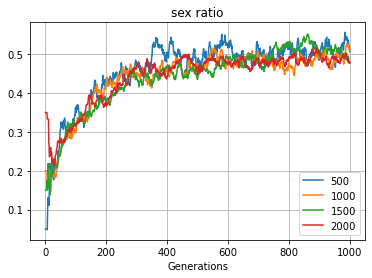

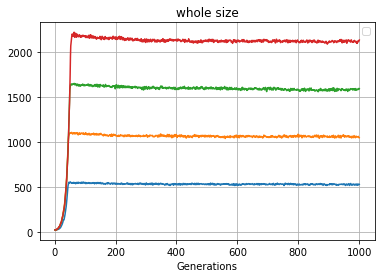

In [33]:
main_S(0.2, 20, [500, 1000, 1500, 2000], 1000)